In [1]:
import pandas as pd
import numpy as np

In [ ]:
!pip install xlrd openpyxl

In [2]:
df = pd.read_excel("/path/to/file.xlsx")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returns,Unit price,profit/unit
0,1.0,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136,NaN,NaN,NaN
1,2.0,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820,NaN,NaN,NaN
2,3.0,CA-2020-138688,2020-06-12,2020-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714,NaN,NaN,NaN
3,4.0,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310,NaN,NaN,NaN
4,5.0,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164,NaN,NaN,NaN


In [27]:
df.rename(columns={"Returns": "Returned"})
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City',
       'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Returns', 'Unit price', 'profit/unit', 'Year'],
      dtype='object')

In [28]:

# Create an empty DataFrame to store the results
result_df = pd.DataFrame()

# List of regions and categories
regions = df['Region'].unique()
categories = df['Category'].unique()

# Calculate the total sales and profit for all categories in all regions
total_sales_all_categories = df['Sales'].sum()
total_profit_all_categories = df['Profit'].sum()

# Extract the year from the 'Order Date' column
df['Year'] = pd.to_datetime(df['Order Date']).dt.year

# List of years in your data
years = df['Year'].unique()

# Iterate through regions
for region in regions:
    # Filter the dataset based on the current region
    region_df = df[df['Region'] == region]

    # Calculate the total sales and profit for all categories in the current region
    total_sales_in_region_all_categories = region_df['Sales'].sum()
    total_profit_in_region_all_categories = region_df['Profit'].sum()

    # Iterate through categories in this region
    for category in categories:
        # Filter the dataset based on the current category
        category_df = region_df[region_df['Category'] == category]

        # Calculate the required values
        category_sales = category_df['Sales'].sum()
        category_profit = category_df['Profit'].sum()

        # Calculate the percentages
        sales_in_region_percentage = (category_sales / total_sales_in_region_all_categories) * 100
        sales_in_all_regions_percentage = (category_sales / total_sales_all_categories) * 100
        profit_in_region_percentage = (category_profit / total_profit_in_region_all_categories) * 100
        profit_in_all_regions_percentage = (category_profit / total_profit_all_categories) * 100
        profit_to_sales_ratio_percentage = (category_profit / category_sales) * 100

        # Calculate the count of returns per category per region
        returns_count = category_df[category_df['Returns'] == 'Yes'].shape[0]
        returns_sales_sum = category_df[category_df['Returns'] == 'Yes']['Sales'].sum()
        returns_profit_sum = category_df[category_df['Returns'] == 'Yes']['Profit'].sum()

        # Calculate returns as a percentage of regional sales and profit
        returns_sales_percentage = (returns_sales_sum / total_sales_in_region_all_categories) * 100
        returns_profit_percentage = (returns_profit_sum / total_profit_in_region_all_categories) * 100

        # Calculate the percentage change in sales compared to the previous year for each year
        sales_percentage_change = [0]  # Initial year has 0% change
        for i in range(1, len(years)):
            previous_year_sales = category_df[category_df['Year'] == years[i - 1]]['Sales'].sum()
            yearly_sales = category_df[category_df['Year'] == years[i]]['Sales'].sum()
            percentage_change = ((yearly_sales - previous_year_sales) / previous_year_sales) * 100
            sales_percentage_change.append(percentage_change)

        # Create a DataFrame for the current row
        row_data = pd.DataFrame({
            'Region': [region],
            'Category': [category],
            'Category Sales in Region / Total Sales in All Categories All Regions': [sales_in_region_percentage],
            'Categorical Sales in Region / Total Sales in All Categories All Regions': [sales_in_all_regions_percentage],
            'Categorical Profit in Region / Total Profit in All Categories All Regions': [profit_in_region_percentage],
            'Categorical Profit in Region / Total Profit in All Categories All Regions': [profit_in_all_regions_percentage],
            'Categorical Profit in Region / Categorical Sales in Region': [profit_to_sales_ratio_percentage],
            'Returns Count': [returns_count],
            'Returns Sales as % of Regional Sales': [returns_sales_percentage],
            'Returns Profit as % of Regional Profit': [returns_profit_percentage],
        })

        # Add columns for percentage change in sales for each year
        for i in range(len(years)):
            row_data[f'Sales % Change (vs. {years[i] - 1})'] = sales_percentage_change[i]

        # Concatenate the row to the result DataFrame
        result_df = pd.concat([result_df, row_data], ignore_index=True)

# Print or save the result DataFrame as needed
print(result_df)


     Region         Category  \
0     South        Furniture   
1     South  Office Supplies   
2     South       Technology   
3     South              NaN   
4      West        Furniture   
5      West  Office Supplies   
6      West       Technology   
7      West              NaN   
8   Central        Furniture   
9   Central  Office Supplies   
10  Central       Technology   
11  Central              NaN   
12     East        Furniture   
13     East  Office Supplies   
14     East       Technology   
15     East              NaN   
16      NaN        Furniture   
17      NaN  Office Supplies   
18      NaN       Technology   
19      NaN              NaN   

    Category Sales in Region / Total Sales in All Categories All Regions  \
0                                           29.944377                      
1                                           32.076662                      
2                                           37.978961                      
3                      

C:\Users\cocko\AppData\Local\Temp\ipykernel_16012\2795242815.py:41: RuntimeWarning: invalid value encountered in scalar divide
  profit_to_sales_ratio_percentage = (category_profit / category_sales) * 100
C:\Users\cocko\AppData\Local\Temp\ipykernel_16012\2795242815.py:57: RuntimeWarning: invalid value encountered in scalar divide
  percentage_change = ((yearly_sales - previous_year_sales) / previous_year_sales) * 100
C:\Users\cocko\AppData\Local\Temp\ipykernel_16012\2795242815.py:41: RuntimeWarning: invalid value encountered in scalar divide
  profit_to_sales_ratio_percentage = (category_profit / category_sales) * 100
C:\Users\cocko\AppData\Local\Temp\ipykernel_16012\2795242815.py:57: RuntimeWarning: invalid value encountered in scalar divide
  percentage_change = ((yearly_sales - previous_year_sales) / previous_year_sales) * 100
C:\Users\cocko\AppData\Local\Temp\ipykernel_16012\2795242815.py:41: RuntimeWarning: invalid value encountered in scalar divide
  profit_to_sales_ratio_percent

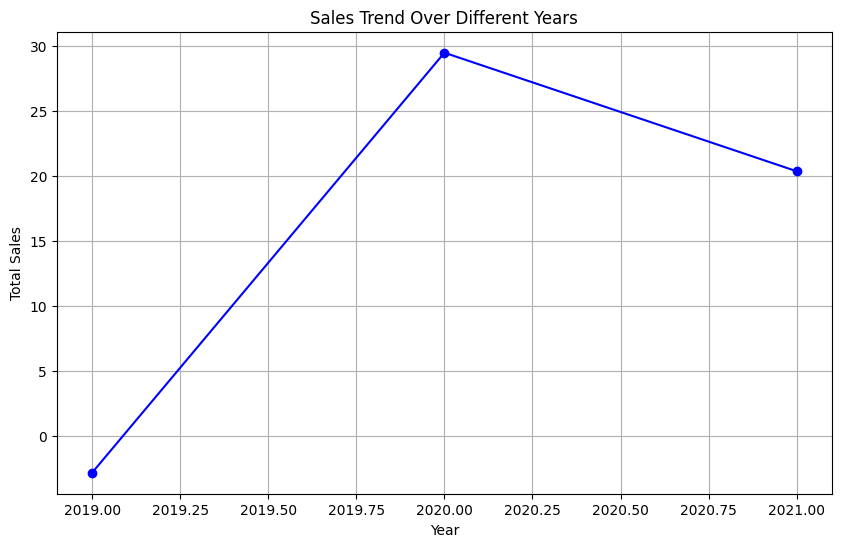

     Year  Total Sales  Percentage Change
0  2018.0  484247.4981                NaN
1  2019.0  470532.5090          -2.832227
2  2020.0  609205.5980          29.471521
3  2021.0  733215.2552          20.355962


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'Order Date' column to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract the year from the 'Order Date' and create a new 'Year' column
df['Year'] = df['Order Date'].dt.year

# Group the data by year and calculate the total sales for each year
yearly_sales = df.groupby('Year')['Sales'].sum()

# Calculate the percentage change in sales compared to the previous year
percentage_change = yearly_sales.pct_change() * 100

# Create a line chart to visualize the sales trend over the years
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, percentage_change.values, marker='o', linestyle='-', color='b')
plt.title('Sales Trend Over Different Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Create a new DataFrame to store the sales trend and percentage change
sales_trend_df = pd.DataFrame({
    'Year': yearly_sales.index,
    'Total Sales': yearly_sales.values,
    'Percentage Change': percentage_change.values
})

# Print or save the table with the sales trend and percentage change
print(sales_trend_df)


In [37]:
result_df.to_excel("output.xlsx", sheet_name='Sheet_name_1')  

In [46]:
# Create an empty DataFrame to store the results
result_df = pd.DataFrame()

# List of regions and categories
regions = df['Region'].unique()
categories = df['Category'].unique()

# Calculate the total sales and profit for all categories in all regions
total_sales_all_categories = df['Sales'].sum()
total_profit_all_categories = df['Profit'].sum()

# Iterate through regions
for region in regions:
    # Filter the dataset based on the current region
    region_df = df[df['Region'] == region]

    # Calculate the total sales and profit for all categories in the current region
    total_sales_in_region_all_categories = region_df['Sales'].sum()
    total_profit_in_region_all_categories = region_df['Profit'].sum()

    # Iterate through categories in this region
    for category in categories:
        # Filter the dataset based on the current category
        category_df = region_df[region_df['Category'] == category]

        # Calculate the required values
        category_sales = category_df['Sales'].sum()
        category_profit = category_df['Profit'].sum()

        # Calculate the percentages
        sales_in_region_percentage = (category_sales / total_sales_in_region_all_categories) * 100
        sales_in_all_regions_percentage = (category_sales / total_sales_all_categories) * 100
        profit_in_region_percentage = (category_profit / total_profit_in_region_all_categories) * 100
        profit_in_all_regions_percentage = (category_profit / total_profit_all_categories) * 100
        profit_to_sales_ratio_percentage = (category_profit / category_sales) * 100

        # Create a DataFrame for the current row with alternate column names
        row_data = pd.DataFrame({
            'Region': [region],
            'Category': [category],
            'Sales in Region / Total Sales in Region': [sales_in_region_percentage],
            'Sales in Region / Total Sales in All Regions': [sales_in_all_regions_percentage],
            'Profit in Region / Total Profit in Region': [profit_in_region_percentage],
            'Profit in Region / Total Profit in All Regions': [profit_in_all_regions_percentage],
            'Profit in Region / Sales in Region': [profit_to_sales_ratio_percentage]
        })

        # Concatenate the row to the result DataFrame
        result_df = pd.concat([result_df, row_data], ignore_index=True)

# Print or save the result DataFrame as needed
print(result_df)


     Region         Category  Sales in Region / Total Sales in Region  \
0   Central  Office Supplies                                33.322650   
1   Central        Furniture                                32.678397   
2   Central       Technology                                33.998952   
3      East  Office Supplies                                30.277215   
4      East        Furniture                                30.686058   
5      East       Technology                                39.036727   
6     South  Office Supplies                                32.076662   
7     South        Furniture                                29.944377   
8     South       Technology                                37.978961   
9      West  Office Supplies                                30.443293   
10     West        Furniture                                34.821148   
11     West       Technology                                34.735559   

    Sales in Region / Total Sales in All Regions  

In [47]:
result_df.to_excel("output2.xlsx", sheet_name='Sheet_name_1')  

In [45]:
result_df.columns

Index(['Region', 'Category',
       'Category Sales in Region / Total Sales in All Categories All Regions',
       'Categorical Sales in Region / Total Sales in All Categories All Regions',
       'Categorical Profit in Region / Total Profit in All Categories All Regions',
       'Categorical Profit in Region / Categorical Sales in Region'],
      dtype='object')

In [21]:
# Create an empty DataFrame to store the results
result_df = pd.DataFrame()

# List of regions and categories
regions = df['Region'].unique()
categories = df['Category'].unique()

# Extract the year from the 'Order Date' column
df['Year'] = pd.to_datetime(df['Order Date']).dt.year

# List of years in your data
years = df['Year'].unique()

# Initialize a DataFrame to store total sales per category per region for each year
yearly_category_sales = pd.DataFrame()

# Iterate through years and regions to calculate yearly category sales
for year in years:
    yearly_category_sales1 = df[df['Year'] == year].groupby(['Region', 'Category'])['Sales'].sum().reset_index()
    yearly_category_sales = pd.concat([yearly_category_sales,yearly_category_sales1], axis=1)
# Iterate through regions
for region in regions:
    # Filter the dataset based on the current region
    region_df = df[df['Region'] == region]

    # Iterate through categories in this region
    for category in categories:
        # Filter the dataset based on the current category
        category_df = region_df[region_df['Category'] == category]

        # Calculate the required values
        category_sales = category_df['Sales'].sum()
        category_profit = category_df['Profit'].sum()

        # Calculate the percentages
        sales_in_region_percentage = (category_sales / category_df['Year'].map(yearly_category_sales.set_index(['Region', 'Category'])[year])) * 100
        sales_in_all_regions_percentage = (category_sales / yearly_category_sales[yearly_category_sales['Category'] == category]['Sales'].sum()) * 100
        profit_in_region_percentage = (category_profit / category_df['Profit'].sum()) * 100
        profit_in_all_regions_percentage = (category_profit / yearly_category_sales[yearly_category_sales['Category'] == category]['Sales'].sum()) * 100
        profit_to_sales_ratio_percentage = (category_profit / category_sales) * 100

        # Calculate the count of returns per category per region
        returns_count = category_df[category_df['Returned'] == 'Yes'].shape[0]
        returns_sales_sum = category_df[category_df['Returned'] == 'Yes']['Sales'].sum()
        returns_profit_sum = category_df[category_df['Returned'] == 'Yes']['Profit'].sum()

        # Calculate returns as a percentage of regional sales and profit
        returns_sales_percentage = (returns_sales_sum / category_df['Year'].map(yearly_category_sales.set_index(['Region', 'Category'])[year])) * 100
        returns_profit_percentage = (returns_profit_sum / category_df['Profit'].sum()) * 100

        # Create a DataFrame for the current row
        row_data = pd.DataFrame({
            'Region': [region],
            'Category': [category],
            'Category Sales in Region / Total Sales in All Categories All Regions': sales_in_region_percentage,
            'Categorical Sales in Region / Total Sales in All Categories All Regions': sales_in_all_regions_percentage,
            'Categorical Profit in Region / Total Profit in All Categories All Regions': profit_in_region_percentage,
            'Categorical Profit in Region / Total Profit in All Categories All Regions': profit_in_all_regions_percentage,
            'Categorical Profit in Region / Categorical Sales in Region': profit_to_sales_ratio_percentage,
            'Returns Count': [returns_count],
            'Returns Sales as % of Regional Sales': returns_sales_percentage,
            'Returns Profit as % of Regional Profit': returns_profit_percentage,
        })

        # Concatenate the row to the result DataFrame
        result_df = pd.concat([result_df, row_data], ignore_index=True)

# Print or save the result DataFrame as needed
print(result_df)


ValueError: Length mismatch: Expected axis has 12 elements, new values have 5 elements

     Region         Category  Year 2 Sales (Delta)  Year 3 Sales (Delta)  \
0     South        Furniture            -13.672743             11.882717   
1     South  Office Supplies              9.023269            -16.940348   
2     South       Technology            -56.774879            218.186424   
3     South              NaN                   NaN                   NaN   
4      West        Furniture            -22.778080            -12.143676   
5      West  Office Supplies            -20.587159             39.571908   
6      West       Technology            -31.650548             -0.319402   
7      West              NaN                   NaN                   NaN   
8   Central        Furniture            -29.899909             -7.536468   
9   Central  Office Supplies            -44.398689             45.324704   
10  Central       Technology            -17.778245            -18.875720   
11  Central              NaN                   NaN                   NaN   
12     East 

C:\Users\cocko\AppData\Local\Temp\ipykernel_6880\2447037872.py:40: RuntimeWarning: invalid value encountered in scalar divide
  year2_sales_delta = ((year2_sales - year1_sales) / year1_sales) * 100
C:\Users\cocko\AppData\Local\Temp\ipykernel_6880\2447037872.py:41: RuntimeWarning: invalid value encountered in scalar divide
  year3_sales_delta = ((year3_sales - year2_sales) / year2_sales) * 100
C:\Users\cocko\AppData\Local\Temp\ipykernel_6880\2447037872.py:42: RuntimeWarning: invalid value encountered in scalar divide
  year4_sales_delta = ((year4_sales - year3_sales) / year3_sales) * 100


In [19]:

# Extract the year from the 'Order Date' column
df['Year'] = pd.to_datetime(df['Order Date']).dt.year

# List of years in your data
years = df['Year'].unique()
years.sort()

# Initialize a DataFrame to store total sales for each year
yearly_total_sales = pd.DataFrame(columns=['Year', 'Sales'])

# Iterate through years to calculate total sales for each year
for year in years:
    total_sales = df[df['Year'] == year]['Sales'].sum()
    yearly_total_sales = pd.concat([
        yearly_total_sales,
        pd.DataFrame({'Year': [year], 'Sales': [total_sales]})
    ], ignore_index=True)

# Calculate the percentage change in Year 2 Sales compared to Year 1
year1_sales = yearly_total_sales[yearly_total_sales['Year'] == years[0]]['Sales'].sum()
year2_sales = yearly_total_sales[yearly_total_sales['Year'] == years[1]]['Sales'].sum()
year3_sales = yearly_total_sales[yearly_total_sales['Year'] == years[2]]['Sales'].sum()
year4_sales = yearly_total_sales[yearly_total_sales['Year'] == years[3]]['Sales'].sum()

year2_sales_delta = ((year2_sales - year1_sales) / year1_sales) * 100
year3_sales_delta = ((year3_sales - year2_sales) / year2_sales) * 100
year4_sales_delta = ((year4_sales - year3_sales) / year3_sales) * 100

# Create a DataFrame for the global sales deltas
result_df = pd.DataFrame({
    'Year 1 Sales': [year1_sales],
    'Year 2 Sales': [year2_sales],
    'Year 3 Sales': [year3_sales],
    'Year 4 Sales': [year4_sales],
    'Year 2 Sales (Delta %)': [year2_sales_delta],
    'Year 3 Sales (Delta %)': [year3_sales_delta],
    'Year 4 Sales (Delta %)': [year4_sales_delta],
})

# Print or save the result DataFrame as needed
print(result_df)


   Year 1 Sales  Year 2 Sales  Year 3 Sales  Year 4 Sales  \
0   484247.4981    470532.509    609205.598   733215.2552   

   Year 2 Sales (Delta %)  Year 3 Sales (Delta %)  Year 4 Sales (Delta %)  
0               -2.832227               29.471521               20.355962  


C:\Users\cocko\AppData\Local\Temp\ipykernel_6880\1289782319.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  yearly_total_sales = pd.concat([


In [26]:
# Extract the year from the 'Order Date' column
df['Year'] = pd.to_datetime(df['Order Date']).dt.year

# List of years in your data
years = df['Year'].unique()

years.sort()
# Initialize a DataFrame to store total sales for each category and region for each year
yearly_category_region_sales = pd.DataFrame()

# Iterate through years, regions, and categories to calculate total sales
for year in years:
    for region in df['Region'].unique():
        for category in df['Category'].unique():
            total_sales = df[(df['Year'] == year) & (df['Region'] == region) & (df['Category'] == category)]['Sales'].sum()
            yearly_category_region_sales = pd.concat([
                yearly_category_region_sales,
                pd.DataFrame({
                    'Year': [year],
                    'Region': [region],
                    'Category': [category],
                    'Sales': [total_sales]
                })
            ], ignore_index=True)

# Calculate the percentage change in Year 2 Sales compared to Year 1
year1_sales = yearly_category_region_sales[yearly_category_region_sales['Year'] == years[0]]['Sales'].sum()
year2_sales = yearly_category_region_sales[yearly_category_region_sales['Year'] == years[1]]['Sales'].sum()
year3_sales = yearly_category_region_sales[yearly_category_region_sales['Year'] == years[2]]['Sales'].sum()
year4_sales = yearly_category_region_sales[yearly_category_region_sales['Year'] == years[3]]['Sales'].sum()

year2_sales_delta = ((year2_sales - year1_sales) / year1_sales) * 100
year3_sales_delta = ((year3_sales - year2_sales) / year2_sales) * 100
year4_sales_delta = ((year4_sales - year3_sales) / year3_sales) * 100

# Create a DataFrame for the category and region sales deltas
result_df = pd.DataFrame({
    'Year 1 Sales': [year1_sales],
    'Year 2 Sales': [year2_sales],
    'Year 3 Sales': [year3_sales],
    'Year 4 Sales': [year4_sales],
    'Year 2 Sales (Delta %)': [year2_sales_delta],
    'Year 3 Sales (Delta %)': [year3_sales_delta],
    'Year 4 Sales (Delta %)': [year4_sales_delta],
})

# Print or save the result DataFrame as needed
print(result_df)


   Year 1 Sales  Year 2 Sales  Year 3 Sales  Year 4 Sales  \
0   484247.4981    470532.509    609205.598   733215.2552   

   Year 2 Sales (Delta %)  Year 3 Sales (Delta %)  Year 4 Sales (Delta %)  
0               -2.832227               29.471521               20.355962  


In [39]:
# ... (Loading and preprocessing the data)

# Create an empty DataFrame to store the results
result_df = pd.DataFrame()

# List of regions and categories
regions = df['Region'].unique()
categories = df['Category'].unique()

# Extract the year from the 'Order Date' column
df['Year'] = pd.to_datetime(df['Order Date']).dt.year

# List of years in your data
years = df['Year'].unique()
years.sort()
# Initialize a DataFrame to store total sales per category per region for each year
yearly_category_sales = pd.DataFrame()

# Iterate through years and regions to calculate yearly category sales
for year in years:
    yearly_category_sales = pd.concat([
        yearly_category_sales,
        df[df['Year'] == year].groupby(['Region', 'Category'])['Sales'].sum().reset_index()
    ])

# Iterate through regions
for region in regions:
    # Filter the dataset based on the current region
    region_df = df[df['Region'] == region]

    # Iterate through categories in this region
    for category in categories:
        # Filter the dataset based on the current category
        category_df = region_df[region_df['Category'] == category]

        # Calculate the percentage change in Year 2 Sales compared to Year 1
        year1_sales = category_df[category_df['Year'] == years[0]]['Sales'].sum()
        year2_sales = category_df[category_df['Year'] == years[1]]['Sales'].sum()
        year3_sales = category_df[category_df['Year'] == years[2]]['Sales'].sum()
        year4_sales = category_df[category_df['Year'] == years[3]]['Sales'].sum()

        year2_sales_delta = ((year2_sales - year1_sales) / year1_sales) * 100
        year3_sales_delta = ((year3_sales - year2_sales) / year2_sales) * 100
        year4_sales_delta = ((year4_sales - year3_sales) / year3_sales) * 100

        # Create a DataFrame for the current row
        row_data = pd.DataFrame({
            'Region': [region],
            'Category': [category],
            'Year 2 Sales (Delta)': [year2_sales_delta],
            'Year 3 Sales (Delta)': [year3_sales_delta],
            'Year 4 Sales (Delta)': [year4_sales_delta],
        })

        # Concatenate the row to the result DataFrame
        result_df = pd.concat([result_df, row_data], ignore_index=True)

# Print or save the result DataFrame as needed
print(result_df)


     Region         Category  Year 2 Sales (Delta)  Year 3 Sales (Delta)  \
0     South        Furniture            -10.620690             15.838269   
1     South  Office Supplies             20.395400             -8.276462   
2     South       Technology            -68.571884            131.346950   
3     South              NaN                   NaN                   NaN   
4      West        Furniture             13.822199             29.496910   
5      West  Office Supplies            -28.352344             25.924219   
6      West       Technology              0.320425             46.306953   
7      West              NaN                   NaN                   NaN   
8   Central        Furniture              8.150747             42.653166   
9   Central  Office Supplies            -31.188575             79.851875   
10  Central       Technology             23.267658             21.622313   
11  Central              NaN                   NaN                   NaN   
12     East 

C:\Users\cocko\AppData\Local\Temp\ipykernel_6880\3594159551.py:42: RuntimeWarning: invalid value encountered in scalar divide
  year2_sales_delta = ((year2_sales - year1_sales) / year1_sales) * 100
C:\Users\cocko\AppData\Local\Temp\ipykernel_6880\3594159551.py:43: RuntimeWarning: invalid value encountered in scalar divide
  year3_sales_delta = ((year3_sales - year2_sales) / year2_sales) * 100
C:\Users\cocko\AppData\Local\Temp\ipykernel_6880\3594159551.py:44: RuntimeWarning: invalid value encountered in scalar divide
  year4_sales_delta = ((year4_sales - year3_sales) / year3_sales) * 100


In [24]:
years

array([2018., 2019., 2020., 2021.,   nan])

In [25]:
result_df.to_excel("outputdelta.xlsx", sheet_name='Sheet_name_1')  

In [40]:

# Extract the year from the 'Order Date' column
df['Year'] = pd.to_datetime(df['Order Date']).dt.year

# Group the data by 'Year,' 'Region,' 'Category' and calculate total sales
sales_report = df.groupby(['Year', 'Region', 'Category'])['Sales'].sum().reset_index()

# Use pivot to reshape the data with years as columns
sales_report_pivot = sales_report.pivot(index=['Region', 'Category'], columns='Year', values='Sales').reset_index()

# Fill any missing values with 0
sales_report_pivot.fillna(0, inplace=True)

# Rename the columns to represent the years
sales_report_pivot.columns.name = None  # Remove the column name
sales_report_pivot.columns = [f'Year {col}' if col != 'Region' and col != 'Category' else col for col in sales_report_pivot.columns]

print(sales_report_pivot)

     Region         Category  Year 2018.0  Year 2019.0  Year 2020.0  \
0   Central        Furniture   32909.6636   35592.0470   50773.1820   
1   Central  Office Supplies   37001.6910   25461.3910   45792.7890   
2   Central       Technology   33926.8100   41820.7840   50863.4050   
3      East        Furniture   47232.7390   53817.4320   46387.1720   
4      East  Office Supplies   35968.9890   42655.2450   61801.2080   
5      East       Technology   45478.7290   59859.3800   72497.4420   
6     South        Furniture   26968.0025   24103.8145   27921.4415   
7     South  Office Supplies   25958.8780   31253.2950   28666.6280   
8     South       Technology   50918.9630   16002.8710   37022.1540   
9      West        Furniture   50082.4480   57004.9435   73819.6405   
10     West  Office Supplies   52846.8540   37863.5320   47679.3570   
11     West       Technology   44953.7310   45097.7740   65981.1790   

    Year 2021.0  
0    44522.2712  
1    58770.5440  
2    43805.3130  
3   

In [41]:
result_df.to_excel("salesyearly.xlsx", sheet_name='Sheet_name_1')  

In [37]:
df['Year']

0       2020
1       2020
2       2020
3       2019
4       2019
        ... 
9994    <NA>
9995    <NA>
9996    <NA>
9997    <NA>
9998    <NA>
Name: Year, Length: 9999, dtype: Int64